## Assignment - Exploratory Data Analysis

**Learning Objectives**
After completing this assignment, you should be comfortable:

- Using `matplotlib` and `seaborn` for data visualization.
- Removing outliers.
- Investigating missing data.

You are free to add new cells to use as a scratch pad, but make sure to clean you code up and present your answer in the cell indicated with `# Write your code here`.

# 1. Introduction and Preparetion

# 1.1 Overview
You've just been hired by the City of Toronto. Congratulation! Toronto has been collecting data on its bike share program since 2017 and the 2019 data has just become available. The city has implemented some new initiatives to try to increase ridership numbers such as **Free Ride Wednesdays** in the month of September and the addition of new bike lanes. You manager has asked you to:
1. Merge the bike share data with local weather data from the TORONTO CITY CENTRE weather station.
2. Investigate the effect of temperature on ridership numbers.   
3. Explore different consumer behaviours between Annual Members and Casual Memebers.

# 1.2 Preparation

In [ ]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

First, let's check to see what weather files are available in the directory. Weather file names have the following structure `en_climate_hourly_ON_6158355_01-2017_P1H.csv`. All weather file names contain the number `6158359`, which is the `TORONTO CITY CENTRE` weather station ID. Create a variable called `weather_filenames` and assign a list containing all weather file names to it.

In [ ]:
weather_filenames = [filename for filename in os.listdir() if '6158359' in filename]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_07-2019_P1H.csv', 'en_climate_hourly_ON_6158359_12-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_06-2019_P1H.csv', 'en_climate_hourly_ON_6158359_11-2019_P1H.csv']


`weather_filenames` contains 12 files containing monthly weather data for 2019. Create a variable `weather_data` and assign a DataFrame to it that contains the data from all 12 `.csv` files.

In [ ]:
# Write your code here.
weather_data = pd.concat(map(pd.read_csv, weather_filenames))

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 00:00,2019,7,1,00:00,19.5,...,NaN,16.1,NaN,100.69,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 01:00,2019,7,1,01:00,18.8,...,NaN,16.1,NaN,100.70,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 02:00,2019,7,1,02:00,18.3,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 03:00,2019,7,1,03:00,15.7,...,NaN,16.1,NaN,100.62,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-07-01 04:00,2019,7,1,04:00,14.9,...,NaN,16.1,NaN,100.61,NaN,NaN,NaN,NaN,NaN,NaN


A column called `'Date/Time'` contains hourly datetime stamps in the format `YYYY-MM-DD HH:MM`. Use `pd.DatetimeIndex()` to set the `'Date/Time'` column as the index of `weather_data`. Now the index of `weather_data` is composed of `Timestamps`.

In [ ]:
weather_data.set_index(pd.DatetimeIndex(weather_data['Date/Time']), inplace=True)
del weather_data["Date/Time"]

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,NaN,16.1,NaN,100.69,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,01:00,18.8,NaN,...,NaN,16.1,NaN,100.70,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,02:00,18.3,NaN,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,03:00,15.7,NaN,...,NaN,16.1,NaN,100.62,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,04:00,14.9,NaN,...,NaN,16.1,NaN,100.61,NaN,NaN,NaN,NaN,NaN,NaN


The index of `weather_data` (`weather_data.index`) should be a series of Timestamps (e.g. `Timestamp('2019-01-01 00:00:00')`).

Then localize them to Toronto's time zone (Eastern Standard Time - `EST`).

In [ ]:
# Write your code here.
weather_data.index = weather_data.index.tz_localize('EST')

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,NaN,16.1,NaN,100.69,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,01:00,18.8,NaN,...,NaN,16.1,NaN,100.70,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,02:00,18.3,NaN,...,NaN,16.1,NaN,100.65,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,03:00,15.7,NaN,...,NaN,16.1,NaN,100.62,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,04:00,14.9,NaN,...,NaN,16.1,NaN,100.61,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1
Next, plot temperature as a function of the datetime index. Your plot should look something like this.

<br>
<img src="images/temp_2019.png" alt="drawing" width="600"/>
<br>

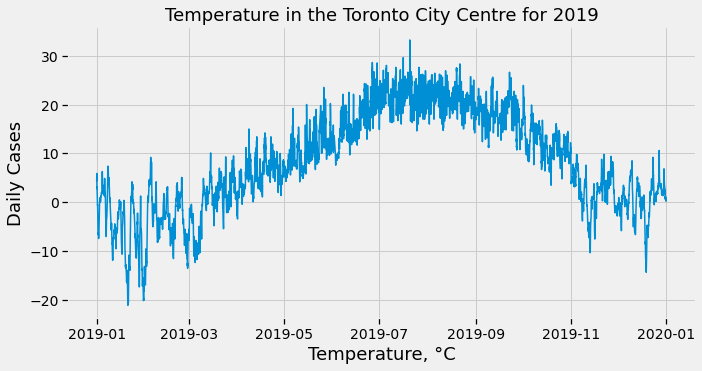

In [ ]:
# Write your code here.
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Temperature in the Toronto City Centre for 2019', fontsize=18)
ax = sns.lineplot(data = weather_data, x = weather_data.index, y='Temp (°C)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Temperature, °C', fontsize=18)
ax.set_ylabel('Daily Cases', fontsize=18)
plt.show()


# 2. Import Bike Share Data
The assignment folder contains data about bike share trips in the city of Toronto for 2019 where there is one `.csv` file for each month. File names have the structure `bike_share_YYYY-MM.csv`.

In [ ]:
# Get bike share file names
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

# Print file names
print(trips_filenames[0:5])

['bike_share_2019-1.csv', 'bike_share_2019-2.csv', 'bike_share_2019-3.csv', 'bike_share_2019-7.csv', 'bike_share_2019-6.csv']


Create a variable `trips_data` and assign a DataFrame to it that contains the bike share data from all 12 `.csv` files.

In [ ]:
trips_data = pd.concat(map(pd.read_csv, trips_filenames))

# Let's remove double spaces from the column names
trips_data.columns = [' '.join(col.split()) for col in trips_data.columns]

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00,Dundas St W / St. Patrick St,1799,Annual Member


Next, convert columns `'Start Time'` and `'End Time'` to datetimes. Then, localize `'Start Time'` and `'End Time'` to Eastern Standard Time (EST). This might take a minute or two.    

In [ ]:
# Write your code here.
trips_data['Start Time'] = pd.DatetimeIndex(trips_data['Start Time']).tz_localize('EST')
trips_data['End Time'] = pd.DatetimeIndex(trips_data['End Time']).tz_localize('EST')

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 2
To check that these datetime conversion were done correctly, generate a plot of daily ride counts. Your plot should look something like this. Hint: Check out `.resample()` and consider making a new variable.

<br>
<img src="images/trips_2019.png" alt="drawing" width="600"/>
<br>

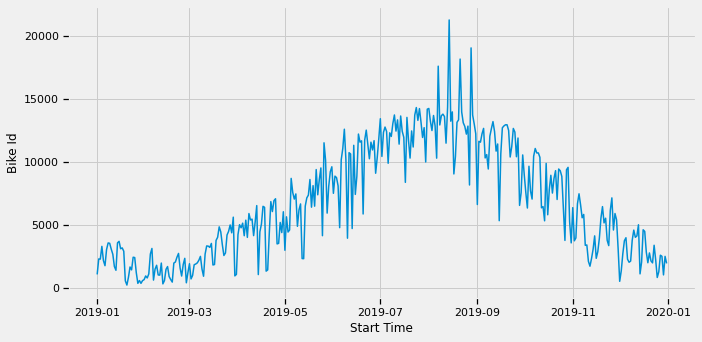

In [ ]:
df_for_graph = trips_data.set_index('Start Time').resample('D').count()

# write your code in here
df_for_graph = trips_data.set_index('Start Time').resample('D').count()
plt.figure(figsize=(10, 5))
graph = sns.lineplot(x= df_for_graph.index, y = df_for_graph['Bike Id'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Temperature, °C', fontsize=18)
ax.set_ylabel('Daily Cases', fontsize=18)
plt.show()

# 3. Clean Bike Share Data
## Question 3a - Missing Data
Large datasets are rarely completely full (no missing values) and its always a good ideas to evaluatate if there is missing data and for what fields.

First, check for missing values in `weather_data`. Create a DataFrame named `weather_data_missing` where the index in the column names of `weather_data` and there is one column named `'count'` which contains the number of missing values for a particular column.

In [ ]:
# Write your code here.
trips_data_missing = pd.DataFrame(trips_data.isnull().sum(), columns = ['count'])

# View DataFrame
trips_data_missing

,count
Trip Id,0
Subscription Id,0
Trip Duration,0
Start Station Id,0
Start Time,0
Start Station Name,0
End Station Id,454
End Time,0
End Station Name,454
Bike Id,0


Next, check for missing values in `trips_data`. Create a DataFrame named `trips_data_missing` where the index in the column names of `trips_data` and there is one column named `'count'` which contains the number of missing values for a particular column.

In [ ]:
# Write your code here.
trips_data = trips_data.dropna()


# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


We can see that some columns have missing values. However, having missing data does not necessarily mean that something is wrong with an entry. For example, the `Weather` column contains the following unique values:

In [ ]:
weather_data['Weather'].unique().tolist()

[nan,
 'Rain',
 'Fog',
 'Thunderstorms',
 'Haze',
 'Rain,Fog',
 'Thunderstorms,Rain',
 'Thunderstorms,Heavy Rain,Fog',
 'Moderate Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Heavy Rain,Fog',
 'Freezing Rain,Fog',
 'Snow',
 'Freezing Rain',
 'Rain,Snow',
 'Moderate Rain',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Moderate Snow',
 'Haze,Blowing Snow',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Fog',
 'Thunderstorms,Heavy Rain']

You can see that only non-normal/clear weather events are listed. So, when `weather_data['Weather'] == NaN`, the conditions are clear. Therefore, we would never want to remove rows where `weather_data['Weather'] == NaN`.

We can see that the first 8 columns of `weather_data_missing` have no missing data, so we can leave `weather_data` and address the missingness on a case-by-case basis depending on which columns we're analyzing.

For `trips_data`, we can see that `'End Station Id'` and `'End Station Name'` have 454 missing values, which is only 0.01% of the dataset. This might suggest corruption and given the small number of missing values, we can safetly drop these rows.

## Question 3b - Missing Data
Drop any rows of `trips_data` with missing values.

In [ ]:
# Write your code here
Q1 = trips_data['Trip Duration'].quantile(0.25)
Q3 = trips_data['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

trips_data = trips_data[(~(trips_data['Trip Duration']<(Q1-(1.5*IQR)))) & (~(trips_data['Trip Duration']>(Q3+(1.5*IQR))))]

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 4a - Outliers
Outliers in your datasets can be both good and bad. One the one hand, they may contain important information while on the other hand, they skew your visualizations and may bias your models.

As a simple first pass, let's look at the summary statistics for `trips_data` using `.describe()` (remember, it only works for numeric data).

In [ ]:
trips_data.describe()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,End Station Id,Bike Id
count,2.345742e+06,2.345742e+06,2.345742e+06,2.345742e+06,2.345742e+06,2.345742e+06
mean,5.960741e+06,3.511236e+05,7.516984e+02,7.182862e+03,7.182338e+03,2.721410e+03
std,7.946182e+05,8.002445e+04,4.291352e+02,1.354392e+02,1.352928e+02,1.387540e+03
min,4.581278e+06,6.537700e+04,0.000000e+00,7.000000e+03,7.000000e+03,1.400000e+01
25%,5.270021e+06,3.088760e+05,4.160000e+02,7.057000e+03,7.057000e+03,1.618000e+03
50%,5.963170e+06,3.370660e+05,6.650000e+02,7.169000e+03,7.169000e+03,2.913000e+03
75%,6.650666e+06,4.051188e+05,1.022000e+03,7.282000e+03,7.282000e+03,3.802000e+03
max,7.334127e+06,5.239440e+05,2.065000e+03,7.511000e+03,7.511000e+03,5.038000e+03


Right away we notice something a bit funny with `'Trip Duration'`. The min and max values seem implausible. A trip cannot last `0 seconds` (you'd have to be biking at the speed of light!) and its unlikely that a trip lasted for `1.240378e+07 seconds`. `1.240378e+07 seconds` is roughly 4.78 months, which would be quite the ride and cost tens of thousands of dollars. We can see that the average `'Trip Duration'` is roughly 17 minutes.

We've been told by Bike Share Toronto that trips lasting less than 1 minute can be considered false trips. Remove all trips from `trips_data` with a duration less than 60 seconds.

In [ ]:
# Write your code here
trips_data =trips_data.dropna()

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


## Question 4b - Outliers
Next, remove any `'Trip Duration'` values less than `Q1 - 1.5 * IQR` and greater than `Q3 + 1.5 * IQR`.

- Q1: The first quartile (`.quantile(0.25)`)
- Q3: The third quartile (`.quantile(0.75)`)
- IQR: The first quartil (`Q3 - Q1`)
<br>
<img src="images/probability_density.png" alt="drawing" width="450"/>
<br>

In [ ]:
# Write your code here
q_1 = trips_data['Trip Duration'].quantile(0.25)
q_3 = trips_data['Trip Duration'].quantile(0.75)
iqr = (q_3 - q_1)
filter_1 = (q_1 - (1.5*(iqr)))
filter_2 = (q_3 + (1.5*(iqr)))

trips_data = trips_data[(trips_data['Trip Duration']>= filter_1) & (trips_data['Trip Duration']<= filter_2)]

# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,merge_time
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member,2019-01-01 00:00:00-05:00
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member,2019-01-01 00:00:00-05:00
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member,2019-01-01 00:00:00-05:00
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member,2019-01-01 00:00:00-05:00
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member,2019-01-01 00:00:00-05:00


## Question 4c - Outliers
Plot a histogram + density plot using `sns.distplot()` of the `'Trip Duration'`. Ensure that `'Trip Duration'` is displayed in minutes. Your plot should look something like this.
<br>
<img src="images/trip_durations.png" alt="drawing" width="450"/>
<br>

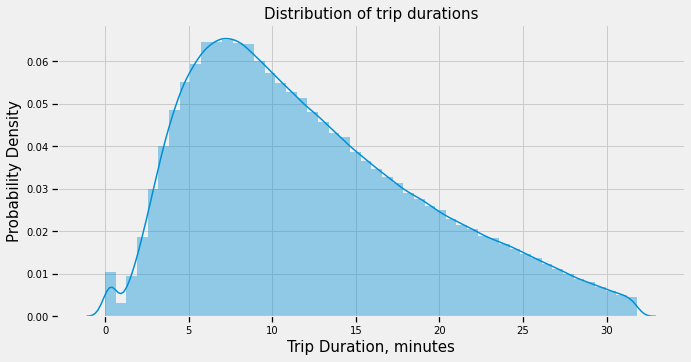

In [ ]:
# Write your code here.
plt.figure(figsize=(10,5))
plt.title('Distribution of trip durations',fontsize=15)
df=trips_data
graph = sns.distplot(x = df['Trip Duration']/60)
graph.xaxis.set_tick_params(labelsize=10)
graph.yaxis.set_tick_params(labelsize=10)
graph.set_xlabel('Trip Duration, minutes', fontsize=15)
graph.set_ylabel('Probability Density', fontsize=15)
plt.show()

## Question 5 - Duplicates
Remove any entries from `trips_data` which have the same `'Trip Id'`.

In [ ]:
# Write your code here
trips_data = trips_data.drop_duplicates(subset='Trip Id')


# View DataFrame
trips_data.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,1799,Annual Member


# 4. Merge Datasets
To facilitate an analysis of the effect of weather on ridership, we must merge two DataFrames (`weather_data` and `trips_data`).


Use the `.merge()` function to combine `weather_data` and `trips_data` using datetime information and set the output to a new variable called `data_merged`. In `trips_data` there are two time stamps corresponding to the start and end of the ride. Use the `'Start Time'` of the rides to merge.

`trips_data` datetimes contain information down to the minute, while `weather_data` is reported every hour. Thus, we must merge based on a common year, month, day, hour. Hint: create a new column in `trips_data` called `'merge_time'` and set it equal to `trips_data['Start Time']` rounded to the nearest hour.

In [ ]:
# create a new column called merge_time, which stores the converted value from the Start_time column from trip_data
trips_data['merge_time'] = trips_data['Start Time'].dt.round(freq='H')

data_merged = pd.merge(weather_data, trips_data, left_on = 'Date/Time',right_on = 'merge_time')

# View DataFrame
data_merged.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,merge_time
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,1834,7352,2019-07-01 00:00:00-05:00,Cosburn Ave / Donlands Ave,7352.0,2019-07-01 00:30:00-05:00,Cosburn Ave / Donlands Ave,989,Casual Member,2019-07-01 00:00:00-05:00
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,338,7016,2019-07-01 00:00:00-05:00,Bay St / Queens Quay W (Ferry Terminal),7068.0,2019-07-01 00:06:00-05:00,Dockside Dr / Queens Quay E (Sugar Beach),4006,Annual Member,2019-07-01 00:00:00-05:00
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,1433,7193,2019-07-01 00:00:00-05:00,Queen St W / Gladstone Ave,7285.0,2019-07-01 00:24:00-05:00,Spadina Ave / Harbord St - SMART,1512,Casual Member,2019-07-01 00:00:00-05:00
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,1042,7369,2019-07-01 00:00:00-05:00,Dupont St / Emerson Ave SMART,7239.0,2019-07-01 00:18:00-05:00,Bloor St W / Manning Ave - SMART,3219,Casual Member,2019-07-01 00:00:00-05:00
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,7,1,00:00,19.5,NaN,...,1229,7204,2019-07-01 00:01:00-05:00,College St / Crawford St,7018.0,2019-07-01 00:22:00-05:00,Bremner Blvd / Rees St,1488,Annual Member,2019-07-01 00:00:00-05:00


# 5. Analysis of 'User Type'

First, we'll explore the daily number for Annual Members and Casual Members. Casual Members pay on a per ride basis while Annual Members pay a monthly subcription fee. The DataFrame `data_merged` has a temporal resolution of a minute. Therefore, in order to look at daily numbers, we'll need to convert `data_merged` so that every row corresponds to a day. Create a new DataFrame called `data_days` with three columns:
- ride: The total number of rides for a particular day.
- annual_members: Number of rides by Annual Members.
- casual_members: Number of rides by Casual Members.
- workday: Was this day a workday (True) or a weekend day (False).

Your DataFrame should looks something like this.

<br>
<img src="images/data_days.png" alt="drawing" width="500"/>
<br>

As a quick sanity check you can check that the number of rows in `data_merged` is equal to the sum of `data_days['rides']`.

Hint: You can use the `.groupby()` method and the `agg()` method to compute this transformation in a single line of code.

In [ ]:
def isworkday(number):
    if number < 5:
        return True
    else:
        return False

In [ ]:
# Write your code here
data_days = data_merged.groupby(pd.Grouper(key = "Start Time", freq = "D")).agg(
    ride = ('Start Time','count'),
    annul_members = ('User Type', lambda x: (x == 'Annual Member').sum()),
    casual_members = ('User Type', lambda x: (x == 'Casual Member').sum()),
)
data_days['workday'] = data_days.index.weekday
data_days['workday'] = data_days['workday'].apply(isworkday)

# View DataFrame
data_days.head()

,ride,annul_members,casual_members,workday
Start Time,,,,
2019-01-01 00:00:00-05:00,1012,889,123,True
2019-01-02 00:00:00-05:00,2274,2197,77,True
2019-01-03 00:00:00-05:00,2259,2218,41,True
2019-01-04 00:00:00-05:00,3259,3116,143,True
2019-01-05 00:00:00-05:00,2121,1924,197,False


## Question 5a
Use `sns.distplot()` to create a plot showing the distributions of daily ride counts from `data_days` for Casual Members and Annual Members. Your plot should look something like this.

<br>
<img src="images/ride_count_histogram.png" alt="drawing" width="600"/>
<br>

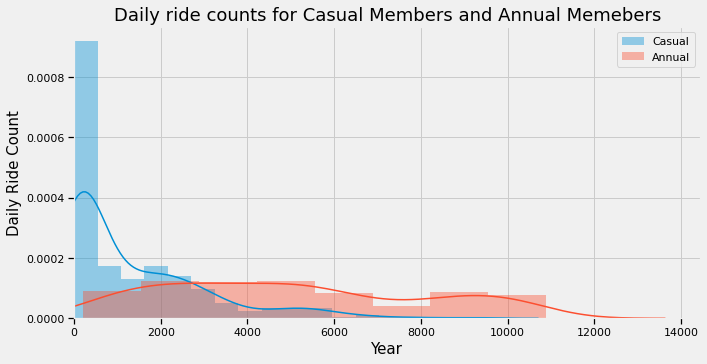

In [ ]:
# Write your code here.
plt.figure(figsize=(10, 5))

graph = sns.distplot(data_days['casual_members'], label='Casual')
graph = sns.distplot(data_days['annul_members'], label='Annual')


plt.title('Daily ride counts for Casual Members and Annual Memebers', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Daily Ride Count', fontsize = 15)

graph.set(xlim=(0))


# show the plot
plt.legend()
plt.show()

## Question 5b
Use `sns.scatterplot()` to create a scatter plot showing the relationship between daily ride counts from `data_days` for Casual Members and Annual Members. Your plot should look something like this.

<br>
<img src="images/ride_count_scatter.png" alt="drawing" width="600"/>
<br>

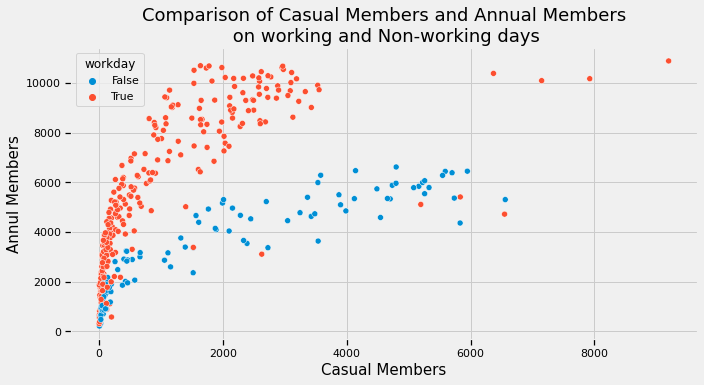

In [ ]:
# Write your code here.
# prepare the data for plotting

plt.figure(figsize=(10, 5))

sns.scatterplot(data = data_days, x = "casual_members", y = "annul_members", hue = "workday")

plt.title('Comparison of Casual Members and Annual Members\n on working and Non-working days', fontsize = 18)
plt.xlabel('Casual Members', fontsize = 15)
plt.ylabel('Annul Members', fontsize = 15)
graph.set(xlim=(0))


# show the plot
plt.legend(title = 'workday')
plt.show()

Let's examine the hourly ride counts for `Annual Members` and `Casual Members`. First thing we have to do i create a new DataFrame called `data_hours`. `data_hours` should have its index set to hours (0 to 23) using the `'Start Time'` column and three columns `'rides', 'annual_members', 'casual_members'`. These should be average hourly values.

In [ ]:
data_hours = data_merged.groupby(pd.Grouper(key = "Start Time", freq = "H")).agg(
    ride = ('Start Time','count'),
    annul_members = ('User Type', lambda x: (x == 'Annual Member').sum()),
    casual_members = ('User Type', lambda x: (x == 'Casual Member').sum())
)

data_hours['hour']=data_hours.index.hour
data_hours=data_hours.groupby('hour').mean()

# View DataFrame
data_hours.head()

,ride,annul_members,casual_members
hour,,,
0,64.602740,47.531507,17.071233
1,39.800000,28.591781,11.208219
2,28.227397,20.142466,8.084932
3,13.517808,9.578082,3.939726
4,10.745205,8.720548,2.024658


## Question 5c
Use `data_hours` to create a plot showing the average number of hourly rides for `Annual Members` and `Casual Memebers`. Your plot should look something like this.

<br>
<img src="images/hourly_rides.png" alt="drawing" width="600"/>
<br>

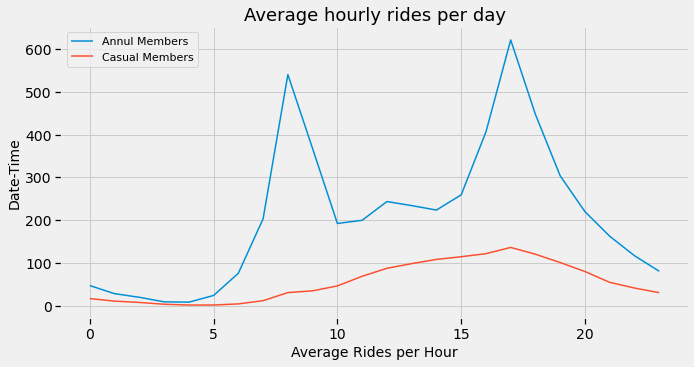

In [ ]:
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Average hourly rides per day', fontsize=18)

ax = sns.lineplot(data = data_hours, x = data_hours.index, y = 'annul_members', label = 'Annul Members')
ax = sns.lineplot(data = data_hours, x = data_hours.index, y = 'casual_members', label = 'Casual Members')

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Average Rides per Hour', fontsize=14)
ax.set_ylabel('Date-Time', fontsize=14)

plt.legend(loc='upper left')
plt.show()

# 6. Analysis of 'Weather'
In this section, we'll be looking at the influence of weather conditions, such as temperature and precipitation, on ridership activity.

First, let's take a look at the missingness for `data_merged`.

In [ ]:
data_merged.isnull().sum(axis=0).to_frame('count')

,count
Longitude (x),0
Latitude (y),0
Station Name,0
Climate ID,0
Year,0
Month,0
Day,0
Time,0
Temp (°C),41691
Temp Flag,2294913


We can see that the `'Weather'` column has 824,894 missing values. Now let's take a look at the unique labels in the `'Weather'` column and how many entries contain each one.

We can see that the most common `'Weather'` labels are `'Rain'`, `'Fog'`, and `'Rain,Fog'`. There is no label for **clear** condition, which suggests that the 824,894 NaN values correspond to **clear** conditions.


The first thing we have to do is transform `data_merged` to contain aggregated values for each hour. Remember, `data_merged`'s grannularity is at the ride level. Each row, corresponds to one ride with a temporal resolution of one minute. Therefore, there can be multiple entries for the same minute.

Create a new variable called `hourly_rides_and_weather` and assign a DataFrame to it containing the following information:
- Index: DatetimeIndex with a resolution of 1 hour (2019-01-01 10:00:00, 2019-01-01 11:00:00, 2019-01-01 12:00:00, 2019-01-01 13:00:00, etc.). Use `'Start Time'` to generate this index.
- Column 1 `'rides'`: How many rides were recorded during a particular hour.
- Column 2 `'annual_members'`: How many `'Annual Member'` rides were recorded during a particular hour.
- Column 3 `'casual_members'`: How many `'Casual Member'` rides were recorded during a particular hour.
- Column 4 `'workday'`: Does this hour correspond to a workday or a weekend day (True, False).
- Column 5 `'temp'`: Reported temperature from the `'Temp (°C)'` column.
- Column 6 `'weather'`: Reported weather conditions from the `'Weather'` column.

<br>
<img src="images/hourly_rides_and_weather_1.png" alt="drawing" width="600"/>
<br>


In [ ]:
def isworkday(number):
    if number < 5:
        return True
    else:
        return False

In [ ]:
# Write your code here
hourly_rides_and_weather = data_merged.groupby(pd.Grouper(key = "Start Time", freq = "H")).agg(
    ride = ('Start Time','count'),
    annul_members = ('User Type', lambda x: (x == 'Annual Member').sum()),
    casual_members = ('User Type', lambda x: (x == 'Casual Member').sum()),
    temp = ('Temp (°C)','max')
)
# iloc
hourly_rides_and_weather['weather'] = weather_data['Weather']
# use iloc
hourly_rides_and_weather['workday'] = hourly_rides_and_weather.index.weekday
hourly_rides_and_weather['workday'] = hourly_rides_and_weather['workday'].apply(isworkday)

# change the order of the columns
columnsTitles = ['ride', 'annul_members', 'casual_members', 'workday', 'temp', 'weather']
hourly_rides_and_weather = hourly_rides_and_weather.reindex(columns=columnsTitles)

hourly_rides_and_weather_temp = hourly_rides_and_weather
# View DataFrame
hourly_rides_and_weather.head(10)

,ride,annul_members,casual_members,workday,temp,weather
Start Time,,,,,,
2019-01-01 00:00:00-05:00,20,20,0,True,5.1,"Rain,Fog"
2019-01-01 01:00:00-05:00,30,27,3,True,5.9,NaN
2019-01-01 02:00:00-05:00,20,17,3,True,5.9,"Rain,Fog"
2019-01-01 03:00:00-05:00,14,14,0,True,3.3,NaN
2019-01-01 04:00:00-05:00,7,7,0,True,3.2,NaN
2019-01-01 05:00:00-05:00,5,5,0,True,3.2,NaN
2019-01-01 06:00:00-05:00,9,8,1,True,2.7,NaN
2019-01-01 07:00:00-05:00,14,13,1,True,2.3,NaN
2019-01-01 08:00:00-05:00,19,19,0,True,1.9,NaN



Next, let's transform `hourly_rides_and_weather` from hourly to daily sampling. As we saw for **Question 7g**, there are strong trends within each day, which could complicate our initial analysis. Therefore, by aggrigating by day-of-the-week, we'll remove some of this trend.

Modify `hourly_rides_and_weather` to include the following information:
- Index: DatetimeIndex with a resolution of 1 day (2019-01-01 00:00:00, 2019-01-02 00:00:00, 2019-01-03 00:00:00, 2019-01-04 00:00:00, etc.). Use `'Start Time'` to generate this index.
- Column 1 `'rides'`: How many rides were recorded during a particular day.
- Column 2 `'annual_members'`: How many `'Annual Member'` rides were recorded during a particular day.
- Column 3 `'casual_members'`: How many `'Casual Member'` rides were recorded during a particular day.
- Column 4 `'workday'`: Does this a workday or a weekend day (True, False).
- Column 5 `'temp'`: The maximum temperature recorded for a particular day.
- Column 6 `'weather'`: This column should contain one of two values (`'clear'` or `'Precipitation'`). `'Clear'` should be assigned to days where 50% or more of the hours of that day had no precipitation events (Rain, Fog, Snow, Rain, Fog, etc.). Remember, `hourly_rides_and_weather['weather']` contains an `NaN` value when there was no precipitation event. When more than 50% of the hours of a day had a precipitation event, assign `'Precipitation'`.  

In [ ]:
# Write your code here
hourly_rides_and_weather = data_merged.groupby(pd.Grouper(key = "Start Time", freq = "D")).agg(
    ride = ('Start Time','count'),
    annul_members = ('User Type', lambda x: (x == 'Annual Member').sum()),
    casual_members = ('User Type', lambda x: (x == 'Casual Member').sum()),
    temp = ('Temp (°C)','max'),
#     weather = ('Weather', lambda x: 'Clear' if x.isna().all.sum() > 12 else 'Precipitation')
)

weather_list = hourly_rides_and_weather_temp.weather.values.tolist()

# split the list into 24 sublists and combine them into a giant chunk
def split(list_a, chunk_size):
  for i in range(0, len(list_a), chunk_size):
    yield list_a[i:i + chunk_size]

# the organized weather list
weather_list = list(split(weather_list, 24))

# count the number of nan in a day
def count_clear(day_weather_list):
    count = 0
    clear_day = []
    for i in weather_list:
        for j in range(len(i)):
            if not isinstance(i[j], str):
                count = count + 1
        clear_day.append(count)
        count = 0
    return clear_day

# the number of nan in a day list
clear_day = count_clear(weather_list)

# check if the weather is clear or precipitation
def check_weather(weather_List):
    result = []
    for i in weather_List:
        if i >= 12:
            result.append('Clear')
        else:
            result.append('Precipitation')
    return result

weather_result = check_weather(clear_day)

hourly_rides_and_weather['weather'] = weather_result

# View DataFrame
hourly_rides_and_weather.head(10)

,ride,annul_members,casual_members,temp,weather
Start Time,,,,,
2019-01-01 00:00:00-05:00,1012,889,123,5.9,Clear
2019-01-02 00:00:00-05:00,2274,2197,77,0.3,Clear
2019-01-03 00:00:00-05:00,2259,2218,41,1.6,Clear
2019-01-04 00:00:00-05:00,3259,3116,143,6.3,Clear
2019-01-05 00:00:00-05:00,2121,1924,197,3.5,Clear
2019-01-06 00:00:00-05:00,1717,1584,133,4.9,Clear
2019-01-07 00:00:00-05:00,3020,2959,61,3.6,Clear
2019-01-08 00:00:00-05:00,3534,3476,58,7.4,Clear
2019-01-09 00:00:00-05:00,3516,3458,58,3.7,Clear


# Question 6a
Let's investigate the relationship between weather conditions and ridership numbers. Create a violin plot using `sns.violinplot()` that looks something like the figure below.

<br>
<img src="images/weather_daily_rides_1.png" alt="drawing" width="600"/>
<br>

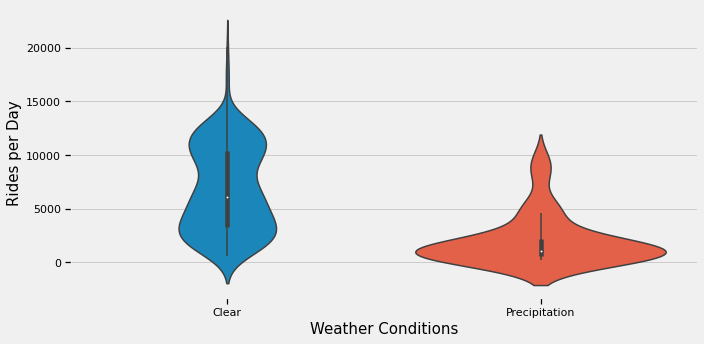

In [ ]:
# Write your code here
plt.figure(figsize=(10, 5))

sns.violinplot(data = hourly_rides_and_weather, x = "weather", y = 'ride')

plt.xlabel('Weather Conditions', fontsize = 15)
plt.ylabel('Rides per Day', fontsize = 15)

# show the plot
plt.show()

## Question 6b
Let's investigate the relationship between the maximum daily temperature and ridership numbers. Create a scatter plot using `sns.scatterplot()` that looks something like the figure below.

<br>
<img src="images/temp_daily_rides.png" alt="drawing" width="600"/>
<br>

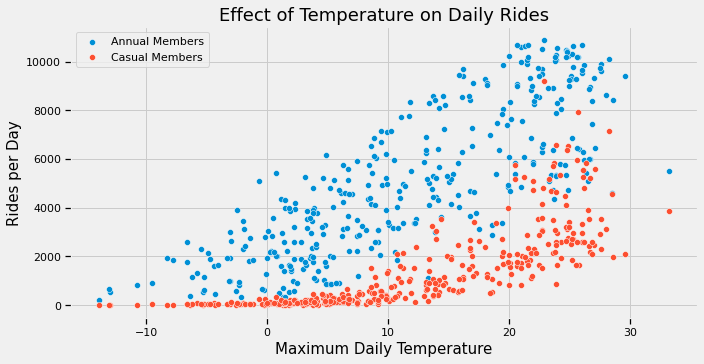

In [ ]:
# Write your code here
plt.figure(figsize=(10, 5))


sns.scatterplot(data = hourly_rides_and_weather, x = "temp", y = "annul_members", label = 'Annual Members')
sns.scatterplot(data = hourly_rides_and_weather, x = "temp", y = "casual_members", label = 'Casual Members')

plt.title('Effect of Temperature on Daily Rides', fontsize = 18)

plt.xlabel('Maximum Daily Temperature', fontsize = 15)
plt.ylabel('Rides per Day', fontsize = 15)

# show the plot
plt.legend()
plt.show()